In [1]:
%matplotlib inline

# SYDE 522 Assignment 3
## Backpropagation and Multilayer Perceptrons

### Due: Monday Nov 6 at 11:59pm

As with all the assignments in this course, this assignment is structured as a Jupyter Notebook and uses Python.  If you do not have Python and Jupyter Notebook installed, the easiest method is to download and install Anaconda https://www.anaconda.com/download.  There is a quick tutorial for running Jupyter Notebook from within Anacoda at https://docs.anaconda.com/free/anaconda/getting-started/hello-world/#python-exercise-jupyter under "Run Python in a Jupyter Notebook"

Implement your assignment directly in the Jupyter notebook and submit your resulting Jupyter Notebook file using Learn.

While you are encouraged to talk about the assignment with your classmates, you must write and submit your own assignment.  Directly copying someone else's assignment and changing a few small things here and there does not count as writing your own assignment.

Make sure to label the axes on all of your graphs.


### Question 1

**a) [1 mark]** The following code generates the nested circles dataset that we have used in class before.

```python
x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
```

As before, you can split this into training and test data
```python
import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0
)
```

To classify this data using a multi-layer perceptron trained using backprop, we can use the built-in implementation in `sklearn`.

```python
mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization
```

To train the model, use
```python
mlp.fit(x_train, y_train)
```

To determine the outputs on your testing data `x_test`, use
```python
output = mlp.predict(x_test)
```

Train your the network using 80% of the data as training data and test it on the other 20%.  Compute the Root Mean Squared Error and report it.

In [2]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.neural_network
import matplotlib.pyplot as plt
import numpy as np

x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0
)

mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization

mlp.fit(x_train, y_train)
output = mlp.predict(x_test)
rmse = np.sqrt(np.mean((y_test-output)**2))
print(f"The root mean squared error is {rmse:.4f}.")

The root mean squared error is 0.1433.


**b) [1 mark]** For the model you trained in part a), plot the output for a grid of inputs between -2 and 2.  This can be done using similar code as used in the last assignment:
```python
extent = (-2, 2, -2, 2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))
```

Has the network learned to classify the data well?

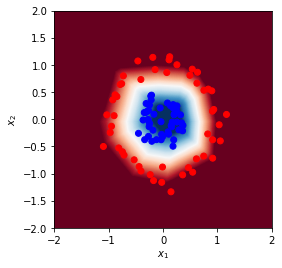

In [3]:
extent = (-2, 2, 2, -2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

The network has learned to classify the data fairly well. Plotting the full dataset against the colour map, we see that most points can be classified correctly.

**c) [1 mark]** Repeat part a) but reduce the network size so that there are only 10 features (i.e. 10 neurons in the hidden layer).  Report the RMSE and generate the same plot as in part b).  Has the network learned to classify the data well?

The root mean squared error is 0.1175.


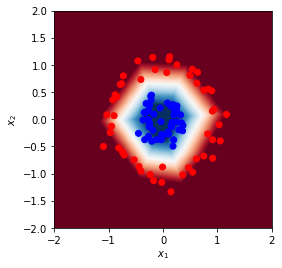

In [4]:
mlp_10 = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(10,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization

mlp_10.fit(x_train, y_train)
output_10 = mlp_10.predict(x_test)

rmse_10 = np.sqrt(np.mean((y_test-output_10)**2))
print(f"The root mean squared error is {rmse_10:.4f}.")

output_pts_10 = mlp_10.predict(pts)
im_10 = plt.imshow(output_pts_10.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

The network has learned to classify the data well. In fact, the root mean squared error is 18% lower in the network with 10 features, meaning it performed better than the network with 20 features.

**d) [1 mark]** Repeat part a) but for the following different number of features: `[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]`.  For each number of features, repeat the process 10 times and compute the average RMSE over those 10 times.  Note that you will have to change the `random_state=0` parameter each time, in both the `MLPRegressor` and the `train_test_split` code.  For example, if you do this in a for loop `for i in range(10):` then you would set `random_state=i`.  

Generate a plot showing how the average RMSE changes as you adjust the number of features.

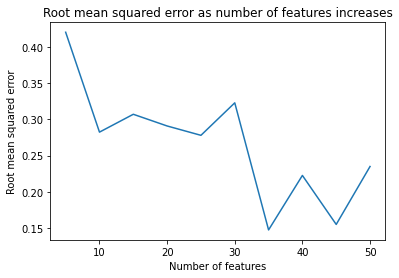

In [5]:
features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
rmse_all = []
for feature in features:
    rmse_total = 0
    for i in range(10):
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
            x, y, test_size=0.2, shuffle=True, random_state=i
        )
        mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(feature,), # one hidden layer with 20 features 
                                            activation='relu',        # rectified linear
                                            learning_rate_init=1e-2,  # learning rate
                                            max_iter=1000,            # number of iterations
                                            early_stopping=True,      # stop training if validation data gets worse
                                            random_state=i)           # random number seed for initialization
        mlp.fit(x_train, y_train)
        output = mlp.predict(x_test)
        rmse_total += np.sqrt(np.mean((y_test-output)**2))
    rmse_all.append(rmse_total/10)

plt.plot(features, rmse_all)
plt.xlabel("Number of features")
plt.ylabel("Root mean squared error")
plt.title("Root mean squared error as number of features increases")
plt.show()
    

**e) [1 mark]** Repeat part d) but add an extra layer of features (i.e. an extra layer inside the network).  Do this by setting `hidden_layer_sizes`.  In the previous example, we set it t `(20,)` to generate one internal layer of 20 features.  To have two internal layers both having 20 features, set it to `(20,20)`.  For this question, use the same number of features in both layers (i.e. try it with `(5,5)`, then `(10,10)`, then `(15, 15)` and so on up to `(50,50)`).  Generate a plot showing how the average RMSE changes as you change these numbers of features.

How does your result in part (e) compare to your result in part (d)?  What does this indicate about how useful the second layer of features is for this task?

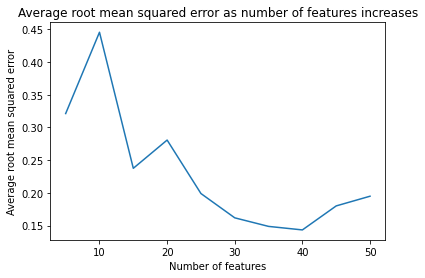

In [6]:
features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
rmse_all = []
for feature in features:
    rmse_total = 0
    for i in range(10):
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
            x, y, test_size=0.2, shuffle=True, random_state=i
        )
        mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(feature,feature), # one hidden layer with 20 features 
                                            activation='relu',        # rectified linear
                                            learning_rate_init=1e-2,  # learning rate
                                            max_iter=1000,            # number of iterations
                                            early_stopping=True,      # stop training if validation data gets worse
                                            random_state=i)           # random number seed for initialization
        mlp.fit(x_train, y_train)
        output = mlp.predict(x_test)
        rmse_total += np.sqrt(np.mean((y_test-output)**2))
    rmse_all.append(rmse_total/10)

plt.plot(features, rmse_all)
plt.xlabel("Number of features")
plt.ylabel("Average root mean squared error")
plt.title("Average root mean squared error as number of features increases")
plt.show()
    

In part (d), the root mean squared error seemed to trend downwards overall as the number of features decreased, but there was no consistent pattern showing a correlation between increasing the number of features and the RMSE decreasing. For example, the RMSE as the number of features changes from 10 to 30 does not decrease very much. However, in part (e), we clearly see a drastic drop in the RMSE as the number of features increases, which happens almost as soon as the number of features increases. This decrease is fairly consistent as the number of features increases, showing a clear negative correlation between the number of features and the RMSE.

**f) [1 mark]** Repeat part a) and b) but for this dataset:
```python
x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
x[:,0]*=0.1
```
(i.e. exactly the same dataset, but with the `x` values scaled by 0.1)

Report the RMSE and generate the output plot from part b).

Is the accuracy better or worse on this scaled dataset, as compared to the original parts a) and b)?  Why?

The root mean squared error is 0.4401.


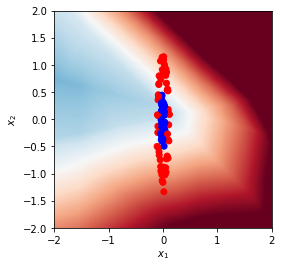

In [7]:
x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
x[:,0]*=0.1

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0
)

mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0,           # random number seed for initialization
#                                           solver='lbfgs'
                                         )           

mlp.fit(x_train, y_train)
output = mlp.predict(x_test)
rmse = np.sqrt(np.mean((y_test-output)**2))
print(f"The root mean squared error is {rmse:.4f}.")

extent = (-2, 2, 2, -2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

The accuracy is significantly worse on this scaled data than on the normal data in parts (a) and (b), with a 207% increase in the RMSE. This is likely because neural networks tend to work better when the features are on a relatively similar scale and close to normally distributed. When one feature is on a different scale, then features with larger scales tend to have more influence. There are two options to fix this:

1. We could scale the data, allowing the gradient descent to move smoothly towards a minima.
2. We use a different solver. By default, the MLP regressor uses the Adam solver, which works well for scaled data. However, for unscaled data points, the Adam solver does not always perform well. If, for example, we changed the solver to use `lbfgs` instead, the model performs much better.

**g) [1 mark]** `sklearn` has a tool for automatically rescaling data for you.  You can create a scaler as follows:

```python
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
```

and then you can transform the `X_train` and `X_test` with `scaler.transform(X_train)` and `scaler.transform(X_test)`.  You can even transform the `pts` used to create the output plot using `scaler.transform(pts)`.

Repeat part f) but use the `scaler` to scale your data before using it.  Report the RMSE and generate the output plot from part b).  How does this accuracy compart to part f) and to the original part a)?

The root mean squared error is 0.0864.


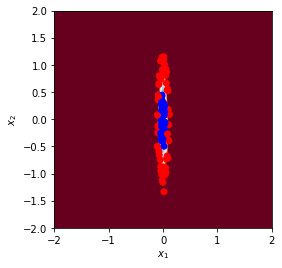

In [8]:
scaler = sklearn.preprocessing.StandardScaler().fit(x_train)

mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0,           # random number seed for initialization
                                         )           

mlp.fit(scaler.transform(x_train), y_train)
output = mlp.predict(scaler.transform(x_test))
rmse = np.sqrt(np.mean((y_test-output)**2))
print(f"The root mean squared error is {rmse:.4f}.")

extent = (-2, 2, 2, -2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(scaler.transform(pts))
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()



This model is much more accurate than the models from both parts (a) and (f) after scaling the data. In fact, the RMSE is about 80% lower than part (f) and about 26% lower than part (a). 

**h) [1 mark]** Repeat parts a) and b) with the following dataset:

```python
x, y = sklearn.datasets.make_moons(n_samples=500, noise=0.05, random_state=0)
```

Try it both with and without the `scaler` from the part (g), and report the RMSE and generate the output plot both ways.  Should you use the `scaler` for this sort of data?  Why or why not?

The root mean squared error without scaling is 0.0770.


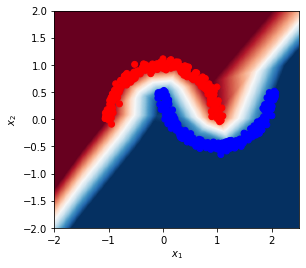

The root mean squared error with scaling is 0.0706.


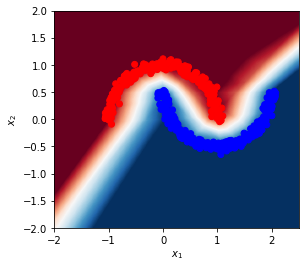

In [9]:
x, y = sklearn.datasets.make_moons(n_samples=500, noise=0.05, random_state=0)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0
)

# Without scaler
mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization

mlp.fit(x_train, y_train)
output = mlp.predict(x_test)
rmse = np.sqrt(np.mean((y_test-output)**2))
print(f"The root mean squared error without scaling is {rmse:.4f}.")

extent = (-2, 2.5, 2, -2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

# With scaler
scaler = sklearn.preprocessing.StandardScaler().fit(x_train)
mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization

mlp.fit(scaler.transform(x_train), y_train)
output = mlp.predict(scaler.transform(x_test))
rmse = np.sqrt(np.mean((y_test-output)**2))
print(f"The root mean squared error with scaling is {rmse:.4f}.")

extent = (-2, 2.5, 2, -2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(scaler.transform(pts))
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.show()


We see that the accuracy of the model with scaling is marginally better than the accuracy of the model without scaling. This is likely because the features inputted into the model were already relatively on the same scale, so using the scaler did not make much of a difference. However, in general, it is good practice to use a scaler before training a model that is sensitive to magnitude, so the scaler should be used.

**i) [1 mark]** Repeat parts a) and b) with the following dataset:

```python
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
```

Try it both with and without the `scaler` from part(g), and report the RMSE and generate the output plot both ways.  Note that you will need to adjust the `extent = (-2, 2, -2, 2)` line so that the output plot covers the same range as the training data (try `(-4,4,-4,4)`).  Should you use the `scaler` for this sort of data?  Why or why not?  Why is the error for this dataset much larger than the error for the other datasets we done so far in this assignment?  Could you improve the accuracy by adjusting the network?  If so, what would you change?

The root mean squared error without scaling is 0.4653.


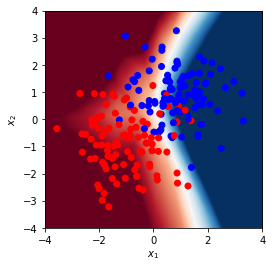

The root mean squared error with scaling is 0.4062.


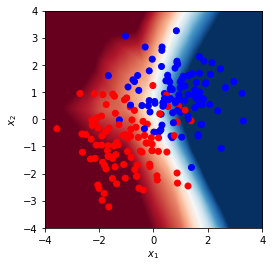

In [10]:
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0
)

# Without scaler
mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization

mlp.fit(x_train, y_train)
output = mlp.predict(x_test)
rmse = np.sqrt(np.mean((y_test-output)**2))
print(f"The root mean squared error without scaling is {rmse:.4f}.")

extent = (-4, 4, 4, -4)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

# With scaler
scaler = sklearn.preprocessing.StandardScaler().fit(x_train)
mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization

mlp.fit(scaler.transform(x_train), y_train)
output = mlp.predict(scaler.transform(x_test))
rmse = np.sqrt(np.mean((y_test-output)**2))
print(f"The root mean squared error with scaling is {rmse:.4f}.")

extent = (-4, 4, 4, -4)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(scaler.transform(pts))
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.show()


We see that the RMSE does improve after scaling. However, overall, the error for this dataset with and without scaling is much larger than the other datasets done so far. This is likely because of the overlapping data points between the two classes. Visually, it is difficult to determine the boundary between the two classes, whereas in the other datasets, it was fairly easy to see the boundary between the two classes. This makes it more difficult for the model to learn features that will allow it to separate the two classes.
 
To improve the accuracy of the network, we can add more features and more hidden layers. However, we must be careful not to add too many features/layers since that can lead to overfitting and also makes the MLP slower to train and run.

### Question 2:


**a) [1 mark]** When using an MLP to do classification, we often don't really care what the exact numerical value of the output is: we just want to classify the input data into a particular category.  The `sklearn.neural_network.MLPClassifier` does this for us, training a separate output for each category (one-hot encoding) and then classifying based on which output is largest.  (Note: it also uses a slightly different Loss function, where the goal is to minimize classification error, rather than minimizing ${1 \over 2}(y_{target}-y)^2$).

You can use the `MLPClassifier` with the same parameters as the `MLPRegressor` we used in question 1.

```
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                           activation='relu',        # rectified linear
                                           learning_rate_init=1e-2,  # learning rate
                                           max_iter=1000,            # number of iterations
                                           early_stopping=True,      # stop training if validation data gets worse
                                           random_state=0)           # random number seed for initialization
```

Use the MLPClassifier on the `digits` dataset we used in previous assignments.  Split it into 80% training and 20% testing.
```
import sklearn.datasets
digits = sklearn.datasets.load_digits()
```

Train the classifier on the training data (using `mlp.fit`) and test it on the test data (using `mlp.predict`).

Report the accuracy of the classifier, which is computed as the proportion of time that the output is the same as the target output:

```np.mean(output == Y_test)```

Also generate and print the *confusion matrix*, which is a matrix showing how often particular digits are mistaken for other digits:

```
confusion = np.zeros((10,10))
for i in range(len(output)):
    confusion[output[i], Y_test[i]] += 1
print(confusion)
```



In [11]:
import sklearn.datasets
digits = sklearn.datasets.load_digits()
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(digits.data, 
                                                                            digits.target, 
                                                                            test_size=0.2, 
                                                                            shuffle=True, 
                                                                            random_state=0)

mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                           activation='relu',        # rectified linear
                                           learning_rate_init=1e-2,  # learning rate
                                           max_iter=1000,            # number of iterations
                                           early_stopping=True,      # stop training if validation data gets worse
                                           random_state=0)           # random number seed for initialization

mlp.fit(X_train, Y_train)

output = mlp.predict(X_test)
accuracy = 100 * np.mean(output == Y_test)
print(f"The accuracy of the classifier is {accuracy:.2f}%.")

confusion = np.zeros((10,10))
for i in range(len(output)):
    confusion[output[i], Y_test[i]] += 1
print("The confusion matrix can be seen below:")
print(confusion)


The accuracy of the classifier is 96.39%.
The confusion matrix can be seen below:
[[27.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 34.  0.  0.  0.  0.  1.  0.  1.  2.]
 [ 0.  0. 35.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 29.  0.  1.  0.  0.  0.  1.]
 [ 0.  0.  0.  0. 29.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0. 39.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 43.  0.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0. 38.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  0. 37.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 36.]]


**b) [1 mark]** Repeat the classification in part a) but for different numbers of features (`[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]`).  As with question 1d, repeat the process 10 time for each size, adjusting `random_state` each time.  Generate a plot with the average classification accuracy for these different feature sizes.

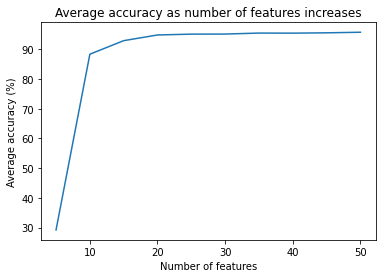

In [12]:
features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
acc_all = []
for feature in features:
    acc_total = 0
    for i in range(10):
        X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(digits.data, 
                                                                                    digits.target, 
                                                                                    test_size=0.2, 
                                                                                    shuffle=True, 
                                                                                    random_state=i)
        
        mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(feature,), # one hidden layer with 20 features 
                                           activation='relu',        # rectified linear
                                           learning_rate_init=1e-2,  # learning rate
                                           max_iter=1000,            # number of iterations
                                           early_stopping=True,      # stop training if validation data gets worse
                                           random_state=i)           # random number seed for initialization
        mlp.fit(X_train, Y_train)
        output = mlp.predict(X_test)
        acc_total += np.mean(output == Y_test)
    acc_all.append(acc_total/10*100)
plt.plot(features, acc_all)
plt.xlabel("Number of features")
plt.ylabel("Average accuracy (%)")
plt.title("Average accuracy as number of features increases")
plt.show()
    

**c) [1 mark]** What happens if you set `hidden_layer_sizes=()`?  This should not generate any new features at all.  How accurate is the system now?  Since there are no new features to learn, what is the MLP doing in this case? (Hint: this is now the same thing as an algorithm we have worked with earlier in the course)

In [13]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(digits.data, 
                                                                            digits.target, 
                                                                            test_size=0.2, 
                                                                            shuffle=True, 
                                                                            random_state=0)

mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(), # one hidden layer with 20 features 
                                           activation='relu',        # rectified linear
                                           learning_rate_init=1e-2,  # learning rate
                                           max_iter=1000,            # number of iterations
                                           early_stopping=True,      # stop training if validation data gets worse
                                           random_state=0)           # random number seed for initialization

mlp.fit(X_train, Y_train)

output = mlp.predict(X_test)
accuracy = 100 * np.mean(output == Y_test)
print(f"The accuracy of the classifier is {accuracy:.2f}%.")

The accuracy of the classifier is 96.39%.


The system is quite accurate with no new features to learn. In this case, the MLP is acting like a Perceptron, which is an algorithm we learned earlier in the course. 

**d) [2 marks]** Using the following dataset, do the best job you can at building a classifier and testing it.

```python
digits = sklearn.datasets.load_digits()
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=True, random_state=0,
)
```

You can use any of the supervised learning models from the assignments so far: the perceptron (`sklearn.linear_model.Perceptron`), regression (`sklearn.linear_model.Ridge`), linear SVM (`sklearn.svm.LinearSVC`), kernel-based SVM ('sklearn.svm.SVC'), and the MLPClassifier (`sklearn.neural_network.MLPClassifier`). Make sure to develop your models only using the training data (perhaps split into training and validation), and only once you have chosen your best model should you test it on the testing data.  You are trying to get the best accuracy (`np.mean(output == Y_test)`) possible.

In [14]:
# Load data
digits = sklearn.datasets.load_digits()
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=True, random_state=0,
)

The most accurate Perceptron occurs at a learning rate of 1 and has an accuracy of 93.89%


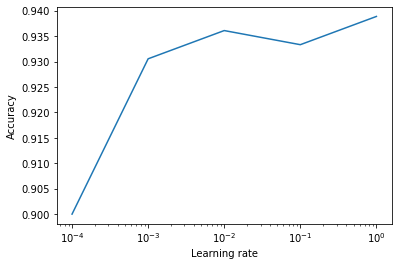

In [15]:
# Use Perceptron
import sklearn.linear_model

rates = [0.0001, 0.001, 0.01, 0.1, 1]
accuracy = []

for rate in rates:
    perceptron = sklearn.linear_model.Perceptron(eta0=rate) 
    perceptron.fit(X_train, Y_train)
    output = perceptron.predict(X_test)
    accuracy.append(np.mean(output == Y_test))
    
plt.plot(rates, accuracy)
plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")

print(f"The most accurate Perceptron occurs at a learning rate of {rates[accuracy.index(max(accuracy))]} and has an accuracy of {max(accuracy)*100:.2f}%")


The maximum validation accuracy is 93.18%, which occurs at a lambda value of 89.10


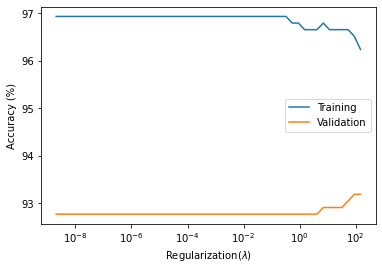

In [16]:
# Use regression

# Split training dataset into training and validation.

X_train_val, X_validation, Y_train_val, Y_validation = sklearn.model_selection.train_test_split(
    X_train, 
    Y_train, 
    test_size=0.5, 
    shuffle=True,
    random_state=0
)

# Create range of lambdas to test on
lambds = np.exp(np.linspace(-20,5,50)) 
acc_train = []
acc_validation = []

for lambd in lambds:
    reg = sklearn.linear_model.RidgeClassifier(alpha=lambd)
    # Train the data using training dataset
    reg.fit(X_train_val, Y_train_val)
    # Determine the outputs of the model for the training and validation datasets 
    output_train = reg.predict(X_train_val)
    output_validation = reg.predict(X_validation)
    # Compute accuracy
    acc_train.append(np.mean(output_train == Y_train_val)*100) 
    acc_validation.append(np.mean(output_validation == Y_validation)*100)
    
# Plot the RMSE for training and validation datasets
plt.semilogx(lambds, acc_train) 
plt.semilogx(lambds, acc_validation) 
plt.xlabel("Regularization($\lambda$)") 
plt.ylabel("Accuracy (%)") 
plt.legend(["Training", "Validation"]) 
plt.plot()

ideal_lambd = lambds[acc_validation.index(max(acc_validation))]

print(f"The maximum validation accuracy is {max(acc_validation):.2f}%, which occurs at a lambda value of {ideal_lambd:.2f}")

In [18]:
# Use ideal lambda value in final model
reg = sklearn.linear_model.RidgeClassifier(alpha=ideal_lambd)
reg.fit(X_train_val, Y_train_val)

output_reg = reg.predict(X_test)
acc_reg = np.mean(output_reg == Y_test)*100

print(f"The accuracy of using a regression model is {acc_reg:.2f}%.")

The accuracy of using a regression model is 93.06%.


In [29]:
# Use linear SVM
Cs = np.logspace(-3, 5, 25)
accuracy_linsvm = []

for i in range(len(Cs)):

svm = sklearn.svm.LinearSVC(C=100, dual = True, max_iter = 1000000000)
svm.fit(X_train_val, Y_train_val)

output_linsvm = svm.predict(X_test)
acc_linsvm = np.mean(output_linsvm == Y_test)*100

print(f"The accuracy of using a linear SVM is {acc_linsvm:.2f}%.")


The accuracy of using a linear SVM is 89.72%.


In [ ]:
# Use kernel-based SVM

In [ ]:
# Use MLP classifier

### Question 3:

**[1 mark]** Describe what you would like to do for your final project.  In particular, tell me what dataset you want to analyse (either one you've made up, or one found online in places like https://www.kaggle.com/datasets or one from the various papers we've discussed in class).  Given that dataset, describe what algorithms you want to try on that dataset.  You should include both very simple algorithms and more complex ones.  Indicate what parameters of those algorithms you would adjust and what you would measure as you are adjusting those parameters.

Even though the final project can be done in groups of 2, each member of the group should write their answer this question separately.